In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## read in data from csv file
df = pd.read_csv('housing_price.csv')
df.columns = ['inverse_age', 'inverse_distance', 'price']
df.head()

,inverse_age,inverse_distance,price
0,0.160,7.404,8.913
1,0.114,1.789,6.308
2,0.049,1.379,5.963
3,0.046,1.373,5.511
4,0.183,15.948,9.774


## Model 1: Inverse Distance As Predictor (y=bx)

In [3]:
## define x to be inverse distance, y to be price psqm
X = df.inverse_distance
Y = df.price

## initialise gradient, intercept, learning rate(alpha) and max iterations values
m = 0                                           # initial value of m
alpha = 0.0001                                  # learning rate
max_iters = 10000                               # max number of iterations
epsilon = 0.0001                                # stopping criterion
n = float(len(X))                               # number of rows in X
Y_pred = m*X                                    # predicted value
loss_func = (1/n) * sum((Y - Y_pred) ** 2)      # next_func
resultsDF = pd.DataFrame(columns=['m', 'cost function (mse)', 'change function']) # initialise df for results


# Performing Gradient Descent 
for i in range(max_iters): 
    current_func = loss_func
    Y_pred = m*X                                # The current predicted value of Y
    loss_func = (1/n) * sum((Y - Y_pred) ** 2)  # original loss function MSE
    D_m = (-2/n) * sum(X * (Y - Y_pred))        # loss function partial derivative WRT m
    
    ## update steps using current values - (learning rate * partial derivatives)
    m = m - alpha * D_m  # update m
    change_func = abs(loss_func - current_func)
    
    ## print iterations
    print("Iteration",i+1, ": m = ",m,
                       ", loss function = ",loss_func,
                       ", change function = ",change_func)
    
    ## append results to df
    resultsDF = resultsDF.append({'m': m,
                                  'cost function (mse)': loss_func,
                                  'change function': change_func},
                                  ignore_index=True)
    
    ## stopping criterion
    if change_func < epsilon and i+1 > 2:
        break;

Iteration 1 : m =  0.00861205782 , loss function =  54.48082579999999 , change function =  0.0
Iteration 2 : m =  0.017132903521986417 , loss function =  53.74307802122086 , change function =  0.7377477787791307
Iteration 3 : m =  0.025563503152709798 , loss function =  53.02087477069248 , change function =  0.7222032505283806
Iteration 4 : m =  0.03390481252731611 , loss function =  52.31388852135817 , change function =  0.7069862493343066
Iteration 5 : m =  0.04215777733771182 , loss function =  51.62179864723743 , change function =  0.6920898741207395
Iteration 6 : m =  0.05032333325978126 , loss function =  50.94429127801851 , change function =  0.6775073692189224
Iteration 7 : m =  0.05840240605946842 , loss function =  50.281059156714726 , change function =  0.6632321213037855
Iteration 8 : m =  0.06639591169773522 , loss function =  49.63180150032015 , change function =  0.6492576563945747
Iteration 9 : m =  0.07430475643440815 , loss function =  48.996223863401276 , change func

Iteration 184 : m =  0.6985015662705509 , loss function =  20.177937744311873 , change function =  0.015299810159259408
Iteration 185 : m =  0.6997156469024064 , loss function =  20.162960304938526 , change function =  0.014977439373346613
Iteration 186 : m =  0.7009168689506126 , loss function =  20.148298443918872 , change function =  0.014661861019654054
Iteration 187 : m =  0.7021053686031368 , loss function =  20.133945511938908 , change function =  0.014352931979964012
Iteration 188 : m =  0.7032812806055511 , loss function =  20.119894999787306 , change function =  0.014050512151602135
Iteration 189 : m =  0.7044447382763085 , loss function =  20.10614053540348 , change function =  0.013754464383826104
Iteration 190 : m =  0.7055958735218585 , loss function =  20.09267588098768 , change function =  0.013464654415798805
Iteration 191 : m =  0.7067348168516014 , loss function =  20.07949493017219 , change function =  0.01318095081549231
Iteration 192 : m =  0.7078616973926852 , lo

Iteration 348 : m =  0.7931372572452111 , loss function =  19.48873227609017 , change function =  0.00046551820127049837
Iteration 349 : m =  0.7933490313443083 , loss function =  19.4882765664726 , change function =  0.00045570961756880024
Iteration 350 : m =  0.7935585624993238 , loss function =  19.48783045876943 , change function =  0.00044610770316921844
Iteration 351 : m =  0.7937658744657505 , loss function =  19.487393750665944 , change function =  0.00043670810348572786
Iteration 352 : m =  0.7939709907474823 , loss function =  19.486966244110267 , change function =  0.00042750655567758145
Iteration 353 : m =  0.7941739345994783 , loss function =  19.4865477452235 , change function =  0.0004184988867663719
Iteration 354 : m =  0.7943747290303991 , loss function =  19.486138064211833 , change function =  0.00040968101166782844
Iteration 355 : m =  0.794573396805216 , loss function =  19.485737015280453 , change function =  0.0004010489313799326
Iteration 356 : m =  0.7947699604

In [4]:
(1/30) * sum((Y - (m*X)) ** 2)

19.47157750393999

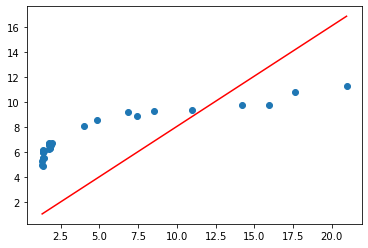

In [5]:
## plot regression line
Y_pred = m*X

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

## Model 2: Inverse Distance As Predictor (y=mx+c)

In [6]:
## define x to be inverse distance, y to be price psqm
X = df.inverse_distance
Y = df.price

## initialise gradient, intercept, learning rate(alpha) and max iterations values
m = 0                                          # initial value of m
c = 0                                          # inital value of c
alpha = 0.01                                   # learning rate
max_iters = 10000                              # max number of iterations
epsilon = 0.0001                               # stopping criterion
n = float(len(X))                              # number of rows in X
Y_pred = m*X + c
loss_func = (1/n) * sum((Y - Y_pred) ** 2)     # next_func
resultsDF = pd.DataFrame(columns=['m', 'c', 'cost function (mse)', 'change function']) # initialise df for results


## gradient descent
for i in range(max_iters): 
    current_func = loss_func
    Y_pred = m*X + c                            # The current predicted value of Y
    loss_func = (1/n) * sum((Y - Y_pred) ** 2)  # original loss function MSE
    D_m = (-2/n) * sum(X * (Y - Y_pred))        # loss function partial derivative WRT m
    D_c = (-2/n) * sum(Y - Y_pred)              # loss function partial derivative WRT c
    
    ## print iterations
    print("Iteration",i+1, ": m = ",m,
                       ", c = ",c,
                       ", loss function = ",loss_func,
                       ", change function = ",change_func)
    
    
    ## append results to df
    resultsDF = resultsDF.append({'m': m,
                                  'c': c,
                                  'cost function (mse)': loss_func,
                                  'change function': change_func},
                                  ignore_index=True)
    
    
    ## update steps using current values - (learning rate * partial derivatives)
    m = m - alpha * D_m  # Update m
    c = c - alpha * D_c  # Update c
    change_func = abs(loss_func - current_func)

    
    ## stopping criterion
    if change_func < epsilon and i+1 > 2:
        break;

Iteration 1 : m =  0 , c =  0 , loss function =  54.48082579999999 , change function =  9.83554034910128e-05
Iteration 2 : m =  0.861205782 , c =  0.1432466666666667 , loss function =  18.727750930266026 , change function =  0.0
Iteration 3 : m =  0.7967082124197238 , c =  0.20197173843670002 , loss function =  18.154723335326864 , change function =  35.753074869733965
Iteration 4 : m =  0.7949532615027397 , c =  0.2656377533270359 , loss function =  17.752236269599177 , change function =  0.5730275949391626
Iteration 5 : m =  0.7890204167481779 , c =  0.32819684651567704 , loss function =  17.35961085969567 , change function =  0.4024870657276871
Iteration 6 : m =  0.7834395281290915 , c =  0.39006729040402377 , loss function =  16.975904438925536 , change function =  0.3926254099035056
Iteration 7 : m =  0.7779031269215931 , c =  0.4512294866705033 , loss function =  16.6009111818703 , change function =  0.3837064207701353
Iteration 8 : m =  0.7724312492498747 , c =  0.51169338211947

Iteration 158 : m =  0.38330712688159635 , c =  4.811423638288133 , loss function =  0.9650777883148628 , change function =  0.011958725321831731
Iteration 159 : m =  0.3823411073050571 , c =  4.822097928108547 , loss function =  0.9536560104429156 , change function =  0.011687168359255429
Iteration 160 : m =  0.38138611882595336 , c =  4.832650326888735 , loss function =  0.9424935966104169 , change function =  0.011421777871947203
Iteration 161 : m =  0.3804420354788142 , c =  4.8430822265176126 , loss function =  0.9315846572171909 , change function =  0.011162413832498719
Iteration 162 : m =  0.3795087327365846 , c =  4.853395002989944 , loss function =  0.9209234364032302 , change function =  0.010908939393226014
Iteration 163 : m =  0.37858608749419903 , c =  4.863590016587838 , loss function =  0.9105043090117436 , change function =  0.010661220813960703
Iteration 164 : m =  0.3776739780523441 , c =  4.873668612060173 , loss function =  0.9003217776211675 , change function =  0.

Iteration 308 : m =  0.31381767846229475 , c =  5.579265750293374 , loss function =  0.47813029258587775 , change function =  0.00038136982108238904
Iteration 309 : m =  0.31364516752146504 , c =  5.581171955741306 , loss function =  0.47776604629154107 , change function =  0.0003727097316965078
Iteration 310 : m =  0.3134746265044787 , c =  5.583056393992653 , loss function =  0.4774100712480829 , change function =  0.00036424629433667866
Iteration 311 : m =  0.31330603291653086 , c =  5.584919313609733 , loss function =  0.4770621796331627 , change function =  0.00035597504345818987
Iteration 312 : m =  0.31313936451968766 , c =  5.586760960316503 , loss function =  0.47672218788948445 , change function =  0.0003478916149201594
Iteration 313 : m =  0.31297459932995286 , c =  5.588581577030964 , loss function =  0.476389916627942 , change function =  0.00033999174367826956
Iteration 314 : m =  0.3128117156143684 , c =  5.59038140389721 , loss function =  0.47606519053297075 , change f

In [7]:
(1/30) * sum((Y - (m*X + c))**2)

0.46622649846546

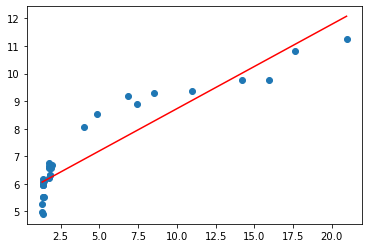

In [8]:
## plot regression line
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

## Model 3: Inverse Age + Distance As Predictor

In [9]:
## define x to be inverse distance, y to be price psqm
X1 = df.inverse_age
X2 = df.inverse_distance
Y = df.price

## initialise gradient, intercept, learning rate(alpha) and max iterations values
m1 = 0             # initial value of m2
m2 = 0             # initial value of m2
c = 0              # inital value of c
alpha = 0.01     # learning rate
max_iters = 10000  # max number of iterations
epsilon = 0.0001    # stopping criterion
n = float(len(X))  # number of rows in X
Y_pred = m1*X1 + m2*X2 + c
loss_func = (1/n) * sum((Y - Y_pred) ** 2)   ## next_func
resultsDF = pd.DataFrame(columns=['m1', 'm2', 'c', 'cost function (mse)', 'change function']) # initialise df for results


## gradient descent
for i in range(max_iters): 
    current_func = loss_func
    Y_pred = m1*X1 + m2*X2 + c                            # The current predicted value of Y
    loss_func = (1/n) * sum((Y - Y_pred) ** 2)            # original loss function MSE
    D_m1 = -(2/n) * sum(X1 * (Y - (m1*X1 + m2*X2 + c)))   # loss function partial derivative wrt m1
    D_m2 = -(2/n) * sum(X2 * (Y - (m1*X1 + m2*X2 + c)))   # loss function partial derivative wrt m2
    D_c = -(2/n) * sum(Y - (m1*X1 + m2*X2 + c))           # loss function partial derivative wrt c
    
    ## update steps using current values - (learning rate * partial derivatives)
    m1 = m1 - alpha * D_m1     # update m1
    m2 = m2 - alpha * D_m2     # update m2
    c = c - alpha * D_c        # update c
    change_func = abs(loss_func - current_func)
    
    ## print iterations
    print("Iteration",i+1, ": m1 = ",m1,
                       ", m2 = ",m2,
                       ", c = ",c,
                       ", loss function = ",loss_func,
                       ", change function = ",change_func)
    
    ## append results to df
    resultsDF = resultsDF.append({'m1': m1,
                                  'm2': m2,
                                  'c': c,
                                  'cost function (mse)': loss_func,
                                  'change function': change_func},
                                  ignore_index=True)
    
    ## stopping criterion
    if change_func < epsilon and i+1 > 2:
        break;

Iteration 1 : m1 =  0.01789275866666667 , m2 =  0.861205782 , c =  0.1432466666666667 , loss function =  54.48082579999999 , change function =  0.0
Iteration 2 : m1 =  0.022469907153080965 , m2 =  0.796438424724623 , c =  0.20193116958854979 , loss function =  18.719556202728466 , change function =  35.76126959727152
Iteration 3 : m1 =  0.02788914867871154 , m2 =  0.7946342561261107 , c =  0.2655726294563207 , loss function =  18.142753448588163 , change function =  0.5768027541403029
Iteration 4 : m1 =  0.033189622617798384 , m2 =  0.7886249378687535 , c =  0.3281000381523994 , loss function =  17.73766542058377 , change function =  0.4050880280043927
Iteration 5 : m1 =  0.038437297000363135 , m2 =  0.7829716539146616 , c =  0.3899346642594137 , loss function =  17.34256390807922 , change function =  0.3951015125045494
Iteration 6 : m1 =  0.04362839061138457 , m2 =  0.7773638042849409 , c =  0.45105672515748474 , loss function =  16.9564927876044 , change function =  0.386071120474820

Iteration 105 : m1 =  0.3620053729413037 , m2 =  0.4485506121969915 , c =  4.03352063056705 , loss function =  2.119544067085265 , change function =  0.03917750662637154
Iteration 106 : m1 =  0.3638776756504357 , m2 =  0.4467836827512863 , c =  4.052746023893649 , loss function =  2.0812614126387077 , change function =  0.03828265444655754
Iteration 107 : m1 =  0.36573245128595067 , m2 =  0.4450370271299043 , c =  4.07175019857965 , loss function =  2.043853164761456 , change function =  0.03740824787725172
Iteration 108 : m1 =  0.36756990115049 , m2 =  0.44331041238653945 , c =  4.090535696441141 , loss function =  2.007299344985215 , change function =  0.03655381977624117
Iteration 109 : m1 =  0.369390224233723 , m2 =  0.44160360825144673 , c =  4.109105030088659 , loss function =  1.971580431310618 , change function =  0.035718913674596786
Iteration 110 : m1 =  0.37119361723892297 , m2 =  0.4399163871006878 , c =  4.127460683262766 , loss function =  1.9366773477778025 , change func

Iteration 199 : m1 =  0.4825630246829911 , m2 =  0.3465759724662628 , c =  5.1410967614343654 , loss function =  0.6341475460056701 , change function =  0.004472160024634353
Iteration 200 : m1 =  0.4834244091740008 , m2 =  0.34597808181474754 , c =  5.147566183185037 , loss function =  0.629777289962608 , change function =  0.004370256043062182
Iteration 201 : m1 =  0.4842798741859003 , m2 =  0.345387032749683 , c =  5.153960953453534 , loss function =  0.6255066096060785 , change function =  0.004270680356529444
Iteration 202 : m1 =  0.48512948764985864 , m2 =  0.34480274666161254 , c =  5.16028192999451 , loss function =  0.6213332298380287 , change function =  0.0041733797680497675
Iteration 203 : m1 =  0.48597331671651534 , m2 =  0.3442251458443046 , c =  5.16652996070699 , loss function =  0.6172549275419477 , change function =  0.004078302296081082
Iteration 204 : m1 =  0.4868114277649486 , m2 =  0.3436541534843748 , c =  5.172705883747611 , loss function =  0.6132695303951865 , 

Iteration 290 : m1 =  0.5432321850548965 , m2 =  0.31263534825471895 , c =  5.506486558006706 , loss function =  0.4655840953526816 , change function =  0.0005564281226256296
Iteration 291 : m1 =  0.5437581207764354 , m2 =  0.31242487302205213 , c =  5.50872876346864 , loss function =  0.4650401054530776 , change function =  0.0005439898996039694
Iteration 292 : m1 =  0.5442819837140654 , m2 =  0.3122167880140936 , c =  5.5109448889097195 , loss function =  0.46450826959902 , change function =  0.0005318358540576384
Iteration 293 : m1 =  0.5448037976004633 , m2 =  0.31201106576767673 , c =  5.513135233996914 , loss function =  0.46398831010593267 , change function =  0.0005199594930873075
Iteration 294 : m1 =  0.545323585895618 , m2 =  0.31180767913518775 , c =  5.515300094954012 , loss function =  0.46347995563378924 , change function =  0.0005083544721434241
Iteration 295 : m1 =  0.5458413717899647 , m2 =  0.31160660128093964 , c =  5.517439764601176 , loss function =  0.462982941042

In [10]:
(1/30) * sum((Y - (m1*X1 + m2*X2 + c)) ** 2)

0.44500381532756106